# Introduction

# Framework

prepare the data, then ...
define, compile, fit (mae covered in intro to ml) and evaluate, predict
 
how can we tell how good our NN is? one way is to take the input, pass it to the neural netwoork, and then see how close the value that the network returns is to the true value.  the close it is, the better the network did.

we can formalize this idea with a loss function.

there are many different loss functions.

# Code

### Step 1: Prepare the data

The first step is to prepare the data.
- remove missing values
- give categorical variables a one-hot encoding
- split the data into training and test sets

- deal with missing values
- one-hot encode categorical features (in exercise: why not label encoding?)
- normalize the input

many different ways to prepare categorical data for neural networks.  we use a one-hot encoding.
https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

In [1]:
# will be entirely hidden (data prep)
# need to mention removing missing values and also one-hot encoding categorical features
# another example: https://www.tensorflow.org/tutorials/keras/regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the data
df = pd.read_csv('../input/auto_mpg.csv') 
df.replace("?", np.nan, inplace=True)
df = df.dropna()

# One-hot encode categorical features
numeric_features = ['cylinders', 'displacement', 'horsepower', 
                    'weight', 'acceleration', 'model year']
df_numeric = df[numeric_features]
df_origin = pd.get_dummies(df.origin, prefix='origin')
X = pd.concat([df_numeric, df_origin], axis=1)
X = X.astype(np.float32)
y = df.mpg

# Split into training and test dataset
#train_dataset = dataset.sample(frac=0.8,random_state=0)
#test_dataset = dataset.drop(train_dataset.index)

In [2]:
print(X.shape)
print(y.shape)

(392, 9)
(392,)


### Step 2: Define the model

The next step is to define the model.  You learned how to do this in the previous tutorial.  
- The input shape matches the 
The model below has two hidden layyers (each with a ReLU activation function, and with either 64 or 32 units).  

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# Initialize a neural network
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(9,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ]
)

### Step 3: Compile the model

Next, we compile the model.  We set tthe 

In [4]:
model.compile(loss='mae')

### Step 4: Train and evaluate the model

In [5]:
history = model.fit(X, y, epochs=1000, verbose=0, validation_split=0.2)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

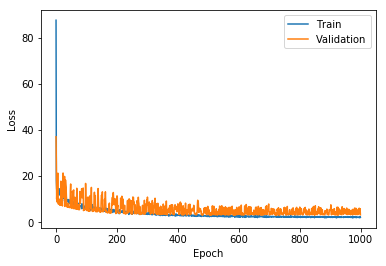

In [7]:
plot_loss(history)

### Step 5: Generate predictions

In [8]:
# change to use test data
predictions = model.predict(X)

In [9]:
print(list(predictions[:5].flatten()))
print(list(y.head()))

[16.79779, 15.740396, 16.42854, 16.726944, 16.562243]
[18.0, 15.0, 18.0, 16.0, 17.0]
